# Double check consensus step

2 options:
1) *include* agent i in consensus mean
2) *exlude* agent i from consensus mean

all options use this computation graph: 


```		
for agent:
	do descent step
for agent:
	do consensus step
```

## As in code - including $x_i$ in consensus mean
- Consensus converges - good

[2.86190455 5.40926171 9.80595998 6.54281181]
(5, 4)


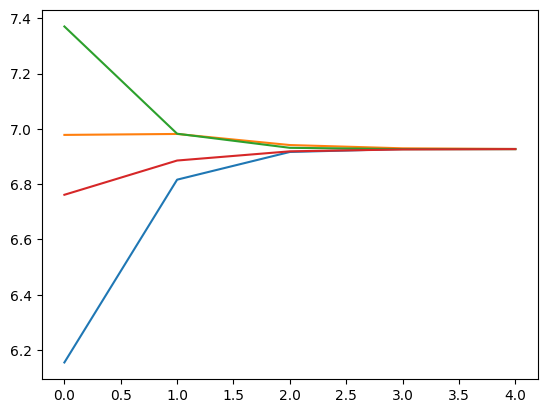

In [103]:
# 1) include agent i
import numpy as np
import copy
import matplotlib.pyplot as plt

ITERATIONS = 5

x = np.array([np.random.uniform(1, 10), np.random.uniform(1, 10), np.random.uniform(1, 10), np.random.uniform(1, 10)])

x_history = np.ndarray(shape = (ITERATIONS, 4))

print(x)

for iteration in range(ITERATIONS):
    x_aux = np.copy(x)
    for i in range(len(x)):
        x[i] = (1/len(x)) * sum(x[j] for j in range(len(x)))
    x_history[iteration] = np.copy(x)
print(np.shape(x_history)) # I want to see shape (100, 4)
for i in range(len(x)):
    plt.plot(range(ITERATIONS), x_history[:, i])




## As in paper - excluding $x_i$ from consensus mean
- still converges, but slower

[7.69438835 8.41814004 2.95405082 7.60450284]
(5, 4)


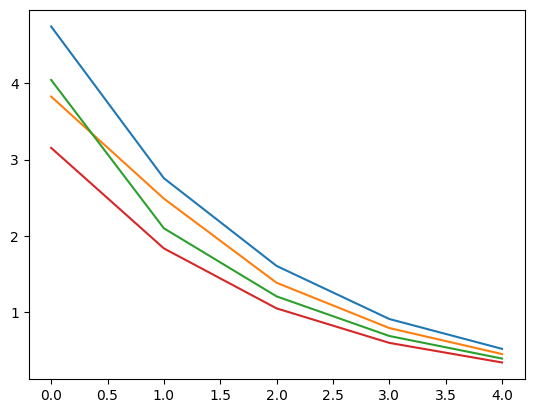

In [108]:
# 1) include agent i
import numpy as np
import copy
import matplotlib.pyplot as plt

ITERATIONS = 5

x = np.array([np.random.uniform(1, 10), np.random.uniform(1, 10), np.random.uniform(1, 10), np.random.uniform(1, 10)])

x_history = np.ndarray(shape = (ITERATIONS, 4))

print(x)

for iteration in range(ITERATIONS):
    x_aux = np.copy(x)
    for i in range(len(x)):
        x[i] = (1/len(x)) * sum(x[j] for j in range(len(x)) if j != i)
    x_history[iteration] = np.copy(x)
print(np.shape(x_history)) # I want to see shape (100, 4)
for i in range(len(x)):
    plt.plot(range(ITERATIONS), x_history[:, i])




# FrODO under sparse graph
(not fully connected network)

### Test

In [1]:
from comdo.utils_proper import *

import pickle

def load_list_from_file(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
def save_list_to_file(lst, filename):
    with open(filename, 'wb') as f:
        pickle.dump(lst, f)


# save_list_to_file(betas_g, '/home/u699081/FOLDER_comdo/SIMULATIONS/initial_conditions_illHess/betas_g.pkl')


initial_conditions = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/random_100_pointsOnCircle.pkl")
betas_g = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/betas_g.pkl")
denominators_betas_gm = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/denominator_betas_gm.pkl")
_lambdas = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/_lambdas.pkl")
lens_memory = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/lens_memory.pkl")

# print("lens_memory= ", lens_memory)
performances_fract = []
performances_noMem = []
performances_shortMem = []

max_iterations = 2000
beta_c = [1]

c = 1

optimize_IllDefinedHessian_Explicit(max_iterations= max_iterations, initial_conditions= [initial_conditions[0]], scaled_memory= False, memory_profiles= ["fractional_v2"], _lambdas= [_lambdas[0]], lens_memory= [lens_memory[0]], betas_c= beta_c, betas_cm= [0], betas_g= [betas_g[0]], betas_gm= [betas_g[0]/denominators_betas_gm[0]] )
    # print("Ran fract successfully")

{('[(0.7009640664095209, -0.7131965911322268), (-0.9447647744149148, -0.3277491739497372), (-0.3759089655900744, 0.9266565974453537), (-0.9999642774618096, 0.008452443450337214)]',
  'fractional_v2',
  0.19383909752074524,
  87,
  1,
  0,
  0.22926453583737416,
  0.13191758027259717): 173}

### Connection weight matrix is added 

#### Check you get the same results when fully connected with equal weights

In [1]:
from comdo.utils_proper import *

import pickle

def load_list_from_file(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
def save_list_to_file(lst, filename):
    with open(filename, 'wb') as f:
        pickle.dump(lst, f)


# save_list_to_file(betas_g, '/home/u699081/FOLDER_comdo/SIMULATIONS/initial_conditions_illHess/betas_g.pkl')


initial_conditions = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/random_100_pointsOnCircle.pkl")
betas_g = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/betas_g.pkl")
denominators_betas_gm = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/denominator_betas_gm.pkl")
_lambdas = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/_lambdas.pkl")
lens_memory = load_list_from_file("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/from_CLUSTERS/initial_conditions_illHess/lens_memory.pkl")

# print("lens_memory= ", lens_memory)
performances_fract = []
performances_noMem = []
performances_shortMem = []

max_iterations = 2000
beta_c = [1]

c = 1

A = np.array([[1, 1, 1, 1],
              [1, 1, 1, 1],
              [1, 1, 1, 1],
              [1, 1, 1, 1]])

performance_dict = optimize_customGraph_IllHess( A=A, max_iterations= max_iterations, initial_conditions= [initial_conditions[0]], scaled_memory= False, memory_profiles= ["fractional_v2"], _lambdas= [_lambdas[0]], lens_memory= [lens_memory[0]], betas_c= beta_c, betas_cm= [0], betas_g= [betas_g[0]], betas_gm= [betas_g[0]/denominators_betas_gm[0]] )

In [2]:
print(performance_dict)

{('[(0.7009640664095209, -0.7131965911322268), (-0.9447647744149148, -0.3277491739497372), (-0.3759089655900744, 0.9266565974453537), (-0.9999642774618096, 0.008452443450337214)]', 'fractional_v2', 0.19383909752074524, 87, 1, 0, 0.22926453583737416, 0.13191758027259717): 1999}
